# **Visualización para análisis exporatorio**
# AE08. Seaborn Violin y Lineplot

Veamos dos nuevos tipos de gráficos en Seaborn; uno de ellos, llamado gráfico de violín, es muy característico de esta librería.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
sns.__version__ # Revisamos que estemos en la ultima versión de seaborn

'0.12.2'

In [21]:
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [ ]:
sns.set(context='notebook', style='darkgrid', palette='dark')

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [23]:
path1 = '/content/drive/MyDrive/ANÁLISIS EXPLORATORIO Y ESTADÍSTICA_3ra_Unidad/VD02.csv'
penguins_df = pd.read_csv(path1).dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


El segundo set de datos, corresponde a las temperaturas máximas diarias, en distintas localidades de Australia:

In [24]:
path2 = "/content/drive/MyDrive/ANÁLISIS EXPLORATORIO Y ESTADÍSTICA_3ra_Unidad/VD05.csv"
temps_df = pd.read_csv(path2)
temps_df.Date = pd.to_datetime(temps_df.Date)
temps_df.sample(5)

,Unnamed: 0,Product code,Bureau of Meteorology station number,Year,Month,Day,max_tmp_day,Days of accumulation of maximum temperature,Quality,City,Date
2271,2271,IDCJAC0010,9225,2019,3,23,27.5,1.0,Y,perth,2019-03-23
938,938,IDCJAC0010,70351,2019,7,28,14.3,1.0,Y,canberra,2019-07-28
814,814,IDCJAC0010,70351,2019,3,26,22.6,1.0,Y,canberra,2019-03-26
691,691,IDCJAC0010,40913,2019,11,23,30.0,1.0,N,brisbane,2019-11-23
2844,2844,IDCJAC0010,66062,2019,10,17,28.4,1.0,Y,sydney,2019-10-17


## <font color='blue'>__Diagramas de violín (violinplots)__</font>

Los diagramas de violín corresponden a un tipo de grafico similar al gráfico de caja y bigotes. En este caso se muestra una barra interna con un punto blanco, donde este punto corresponde a la mediana, y el largo de la barra corresponden a $Q1$ y $Q3$. Se muestra además con unas líneas la misma cobertura de los bigotes, pero la gran diferencia es que el diagrama de violín muestra una estimación de la distribución a través de los distintos valores a graficar. El método corresponde a `sns.violinplot(x=X, y=Y, data=df)`.

<img src="https://drive.google.com/uc?id=1kQTLE-_L-eZT2TfRaazRMTH5tpg8R3Gi">

[Documentación Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot)


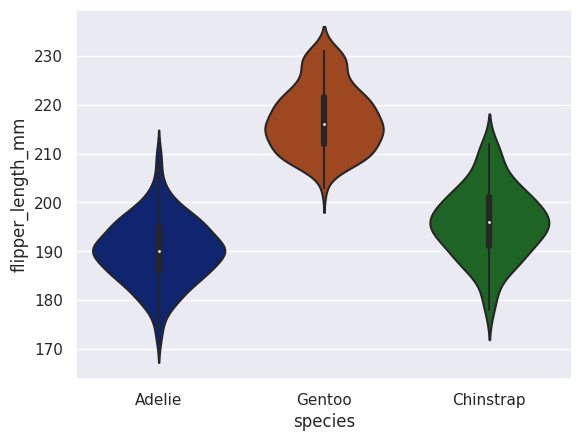

In [25]:
sns.violinplot(x='species', y='flipper_length_mm',
               data=penguins_df)
plt.show()

Al igual que los boxplots, nosotros podemos separar cada *violinplot* según el parámetro `hue`. Adicionalmente, nosotros podemos utilizar el parámetro `split=True` en conjunto con `hue` para poder presentar de forma divida en un mismo violin, las distintas distribuciones por la que estamos separando según la columna `hue`:

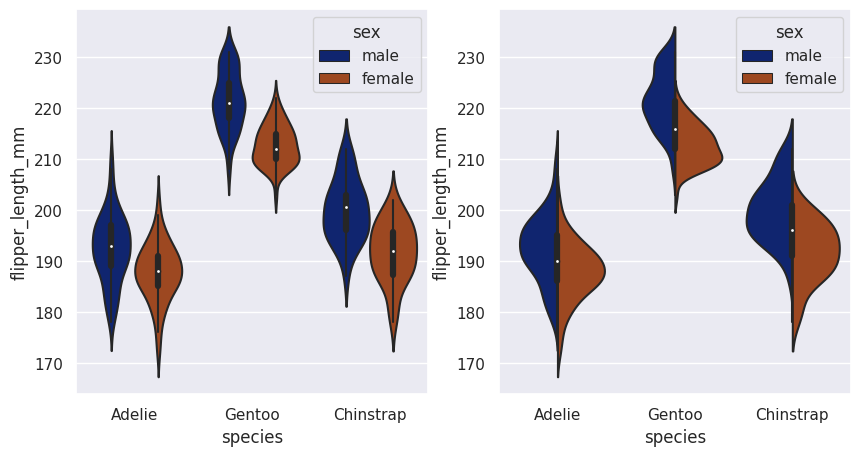

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', ax = ax[0])
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', split=True, ax = ax[1])
plt.show()

## <font color='blue'>__Diagramas de Líneas (lineplot)__</font>

Para este tipo de gráfico vamos a utilizar el set de datos de la temperatura y el método `sns.lineplot`. Tal como el método de `sns.barplot`, `Seaborn` si es que tiene la oportunidad, va a hacer agregación de los datos dependiendo de cómo nosotros presentemos los datos, el uso de los parametros `hue` y posibles valores dependientes de categorías (en este caso, como tenemos 8 ciudades de Australia, vamos a tener 8 mediciones de temperatura para cada día).

[Documentación Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot)


<ipython-input-27-e3c2a7eec7f1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Date', y='max_tmp_day', data=temps_df, ci='sd') # Definimos el Intervalo de confianza como la desviación estandar


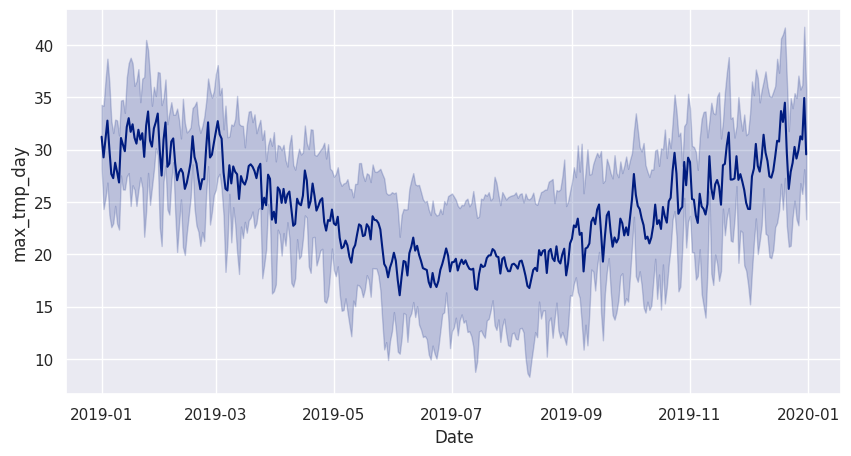

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='max_tmp_day', data=temps_df, ci='sd') # Definimos el Intervalo de confianza como la desviación estandar
plt.show()

## <font color='blue'>__Ejercicios__</font>

### <font color='green'>__Actividad 1:__</font>

Para esta dinámica revisitaremos el set de datos de precios de casa de King County Housing (VD08.csv). Realizaremos visualizaciones sencillas utilizando el conocimiento recientemente adquirido:

- Graficar la matriz de correlación para las distintas variables numéricas **nota:** el parámetro `fmt='.2f'` transformara el texto de anotaciones a 2 decimales máximo
- Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos
- Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables (como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). **¿Qué puede observar de esto?**
- utilizando subplots, genere 2 lineplots
    - Precio de las casas a través de los años que fueron construidas
    - Precio de las casas a través de los años que fueron construidas pero separadas por la columna **waterfront**


In [28]:
path3 = "/content/drive/MyDrive/ANÁLISIS EXPLORATORIO Y ESTADÍSTICA_3ra_Unidad/VD08.csv" #Ruta ubicacón del archivo texto plano que contiene los datos para el estudio.
housing_df = pd.read_csv(path3) #Extraemos los datos con la libreria Pandas.
housing_df=housing_df.set_index(housing_df.columns[0]) # Transformar la primera columna en en un índice, debido a que al ser un ID no aporta valor al análsis.
housing_df.head()#Visualizamos los 05 primeros registros del set de datos.
housing_df.shape #Obtenemos 20 atributos, de un conjunto de datos de 21.613 registros.

(21613, 20)

**Actividad 01, tarea 01:** "Graficar la matriz de correlación para las distintas variables numéricas nota: el parámetro fmt='.2f' transformara el texto de anotaciones a 2 decimales máximo"

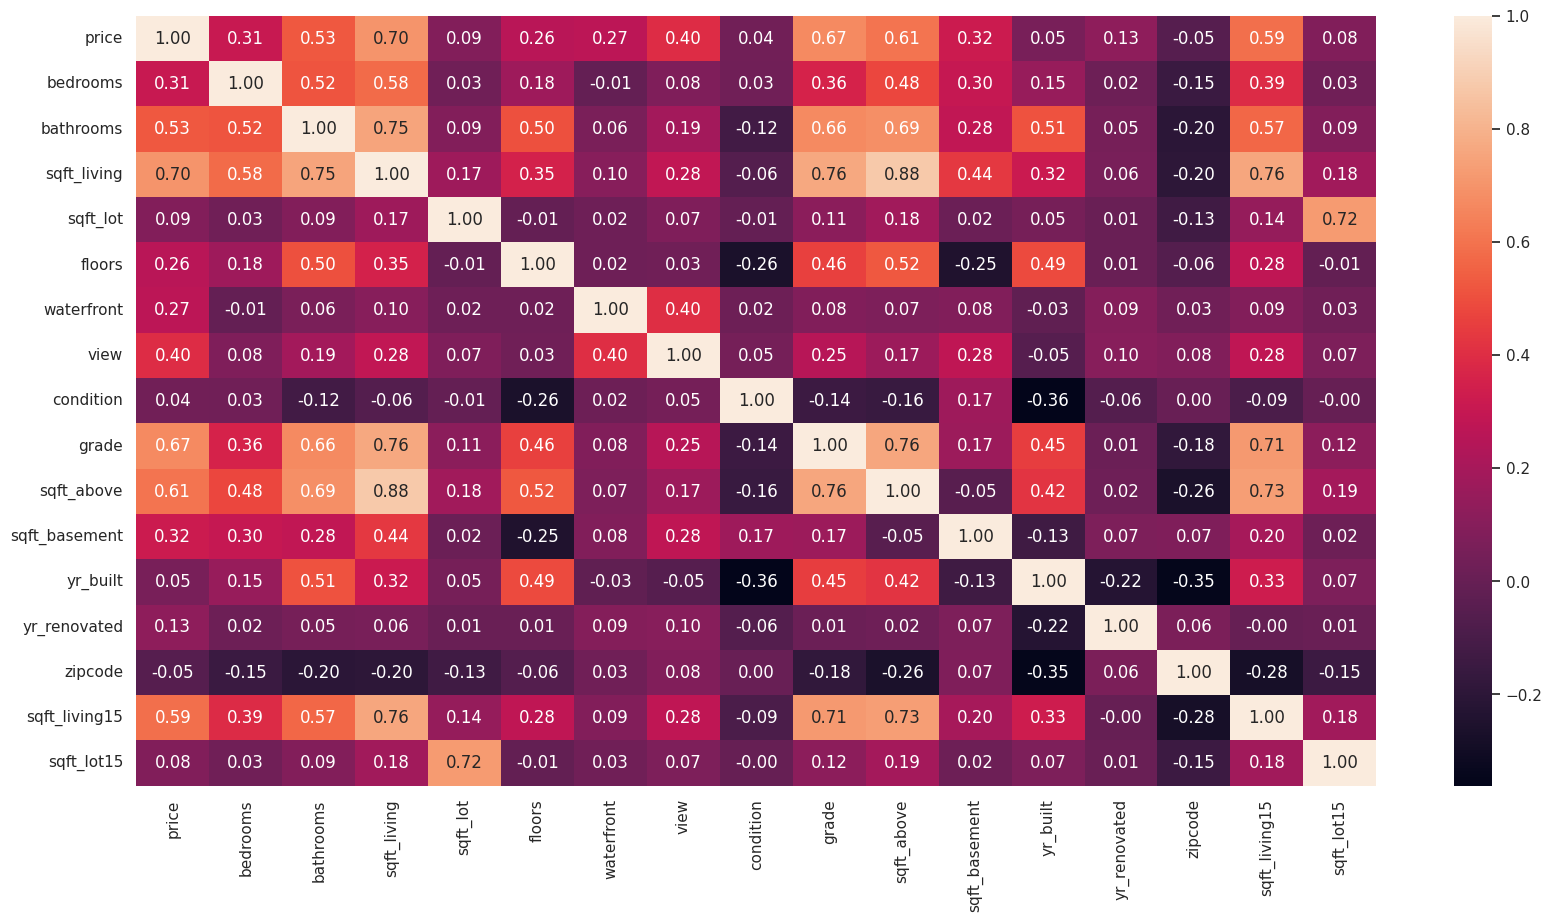

In [29]:
#Seleccionamos los valores de interés, dejamos fuera los atributos índice, lat, long y date
corr = housing_df.loc[:,housing_df.columns.isin(['price',
                                                 'bedrooms',
                                                 'bathrooms',
                                                 'sqft_living',
                                                 'sqft_lot',
                                                 'floors',
                                                 'waterfront',
                                                 'view',
                                                 'condition',
                                                 'grade',
                                                 'sqft_above',
                                                 'sqft_basement',
                                                 'yr_built',
                                                 'yr_renovated',
                                                 'zipcode',
                                                 'sqft_living15',
                                                 'sqft_lot15'])].corr()
plt.figure(figsize = (20,10))#Definimos el tamaño de la figura
sns.heatmap(corr,annot=True,fmt='.2f') #Generamos el heatmap, le pasamos como parámetro la matriz de correlación.
plt.show()# Mostramos el heatmap

**Conclusiones del Heatmap:**

1. Existe una relación 0,7 del precio(price) con los pies cuadrados(sqft_living)de la sala de estar, esta relación es alta.
Seguido del factor de calidad (grade).
2. La relación entre los pies cuadrados del living con la estructura que sobresale del suelo (sqft_above) tambien es alta de 0.88.



**Actividad 01, tarea 02:** Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos

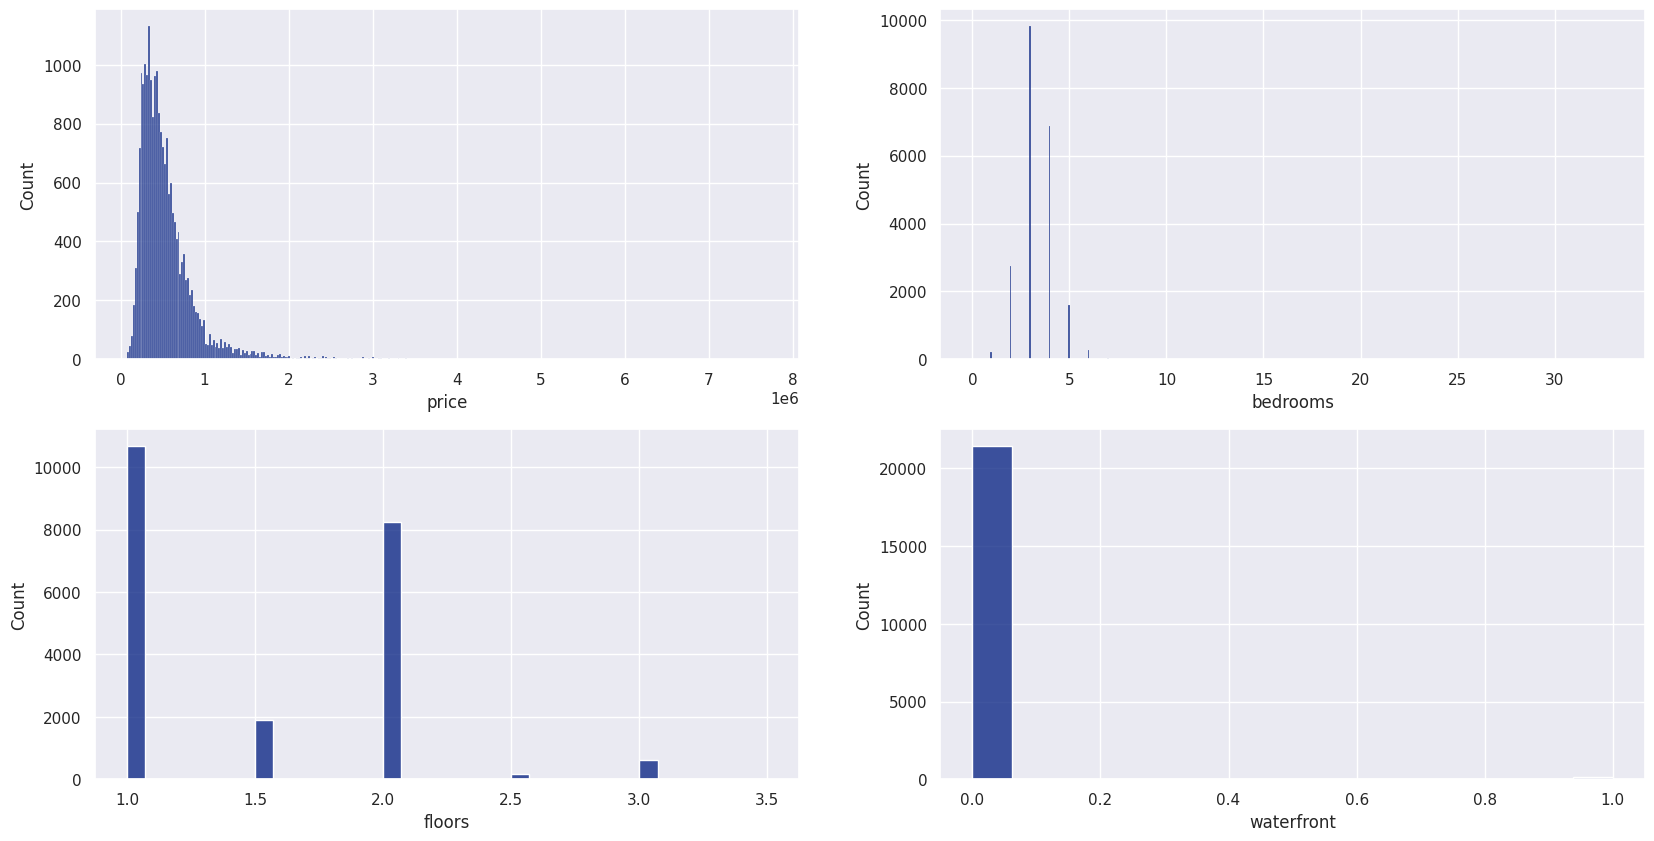

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot(x='price',data=housing_df, ax=ax[0,0])
sns.histplot(x='bedrooms',data=housing_df, ax=ax[0,1])
sns.histplot(x='floors',data=housing_df, ax=ax[1,0])
sns.histplot(x='waterfront',data=housing_df, ax=ax[1,1])
plt.show()

**Actividad 01, tarea 03:** Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables (como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). ¿Qué puede observar de esto?

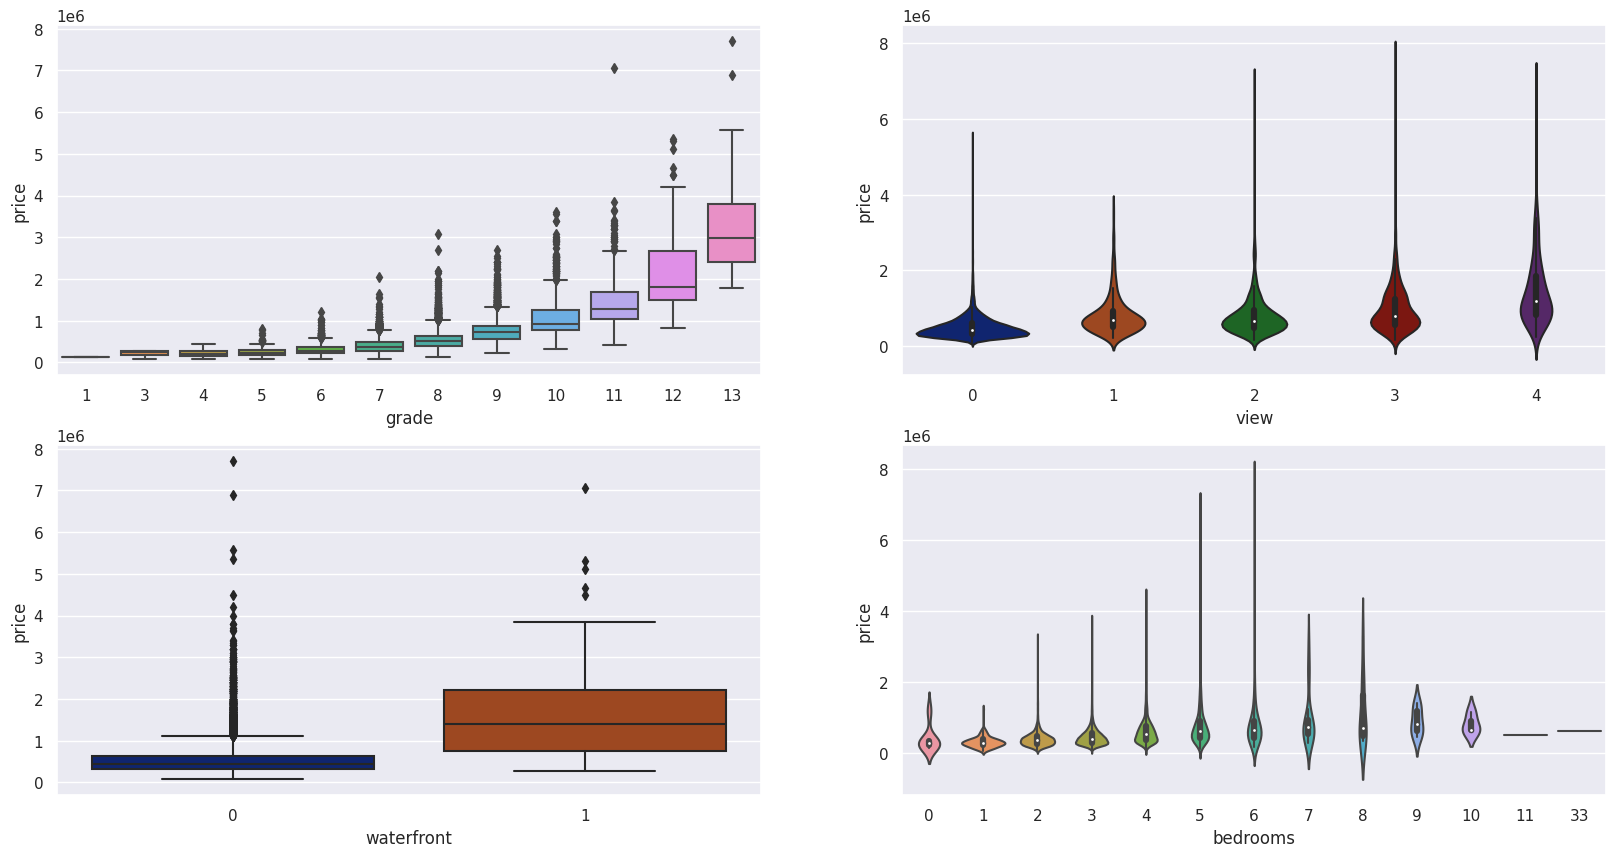

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.boxplot(x='grade',y='price',data=housing_df, ax=ax[0,0])
sns.violinplot(x='view',y='price',data=housing_df, ax=ax[0,1])
sns.boxplot(x='waterfront',y='price',data=housing_df, ax=ax[1,0])
sns.violinplot(x='bedrooms',y='price',data=housing_df, ax=ax[1,1])
plt.show()


**Observaciones:**

*  Se puede concluir que los precios altos están mas concetrados en los grados altos,sin embargo se presentan muchos valores atípicos si se considera esta variable.

* Las casas que poseen vista al mar, lago o río tambíen tienes precios por lo general elevado, pero su distribución es mucho mas uniforme que las casas de que no poseen aquella vista, las cuales tienes muchos valores fuera de rango o ouetliers.
* Así mismo, los valores de las casas con 05 o 06 dormitorios presentan una distrubción desuniforme respecto al resto de las casas, puede que este tipo de casas tengan una mayor demanda, respecto a tamaño promedio de una familia americana promedio.

|**Actividad 01, tarea 04:** Utilizando subplots, genere 2 lineplots  

* Precio de las casas a través de los años que fueron construidas
* Precio de las casas a través de los años que fueron construidas pero separadas por la columna waterfront

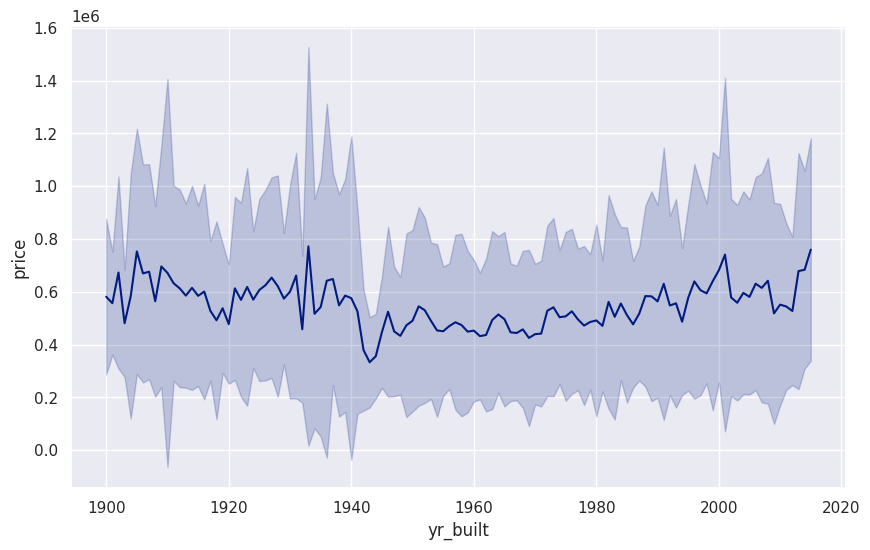

In [30]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.lineplot(x='yr_built',y='price',data=housing_df, errorbar='sd')
plt.show()


En general los precios de las casas se mantienen fluctuantes a travez de los años entre los valores 0.4 y 08, exceptuando una gran caída de las casa construída en los primeros años de la década de 1940.

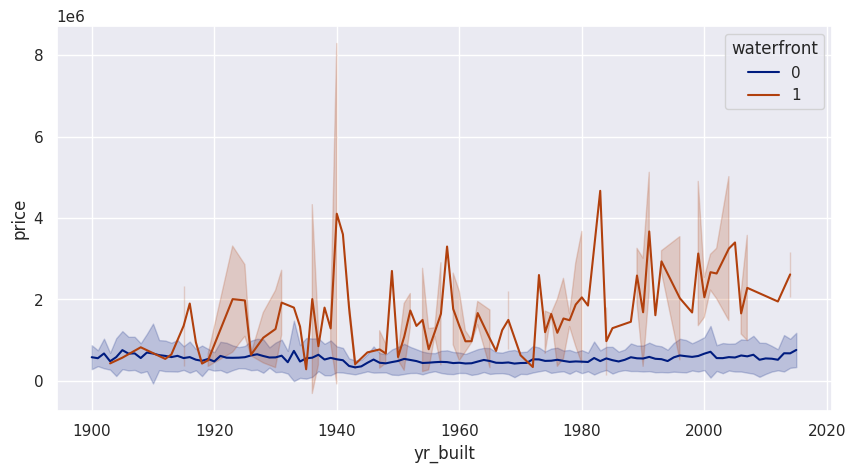

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.lineplot(x='yr_built',y='price', hue="waterfront", data=housing_df, errorbar='sd')
plt.show()

Los precios entre de las casas que tienen no tienen vista a agua en general no tienen mucha variación en relación al año de construcción, sin embargo las casas que si tiene vista al agua, tienen mucha variación en según el año de construcción, lo que podría ser una una buena variable predictora.

<font color='green'>Fin actividad 1</font>

**Experimento:**


Trazar la relación entre **precio** y espacio **sqft_living**

<ipython-input-34-af2cd8229b95>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.5490196078431373, 0.03137254901960784, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(sqft_living, r.intercept + r.slope*sqft_living, 'r', label='fitted line' ,c='#4a70e1')


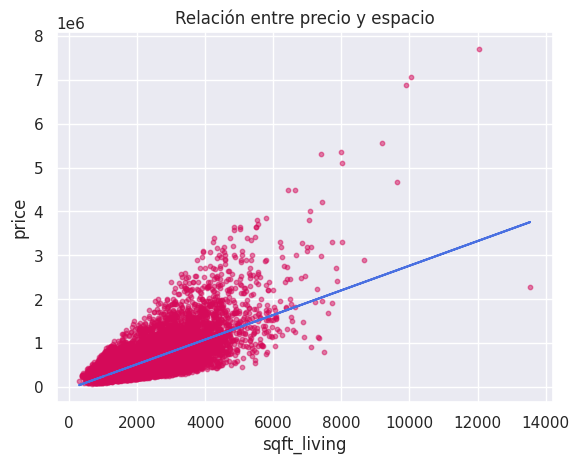

In [34]:
from scipy import stats as st
sqft_living = housing_df['sqft_living']
price =  housing_df['price']

#regresion
r = st.linregress(sqft_living,price)
plt.plot(sqft_living, r.intercept + r.slope*sqft_living, 'r', label='fitted line' ,c='#4a70e1')

# Plot
plt.scatter(sqft_living, price, s=10, c='#d50a59', alpha=0.5)
plt.title('Relación entre precio y espacio')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

Podemos observar que los precios y el espacio están concentrados a la izquierda inferior, es decir el dataset cuenta con gran cantidad de casas con precios que a medida bajan tambíen disminuye su cantidad de espacio.